## 🦙 Serving a Quantized LLaMA Model from HuggingFace Hub using the `llama-cpp-python` Library

Large Language Models (LLMs) like LLaMA (Large Language Model Meta AI) have gained widespread recognition for their ability to perform various NLP tasks with high accuracy. However, running inference for such models, especially in resource-limited environments like Google Colab, poses challenges due to their large size and high computational requirements.

In this guide, we will explore how to serve a quantized version of a fine-tuned LLaMA 3.1 8B model hosted on Hugging Face. By applying quantization—a technique that reduces the model’s size and increases inference speed by lowering the precision of its weights—we can serve the model efficiently. For this, we will use the [ggml-org/gguf-my-repo](https://huggingface.co/spaces/ggml-org/gguf-my-repo) to generate the quantized version of the model and then deploy it using the `llama-cpp-python` library on Google Colab.

### In this recipe, we will cover:
- Quantizing the LLaMA model
- Setting up the environment on Google Colab/ Jupyter Notebook
- Serving the model and running inference

By the end of this recipe, you will be able to deploy and serve quantized LLaMA models on Google Colab/ Jupyter Notebook, unlocking the full potential of these powerful models in a resource-constrained environment.


## Step 1 - Quantizing A LLaMA Model

1. Push your fine-tuned LLaMA model to Hugging Face Hub. or select a fine-tuned LlaMa model present on Hugging Face Hub. For this recipe we will be using [aaditya/Llama3-OpenBioLLM-8B](https://huggingface.co/aaditya/Llama3-OpenBioLLM-8B)- a State-of-the-Art Open Source Biomedical Large Language Model
2. Visit the [ggml-org/gguf-my-repo](https://huggingface.co/spaces/ggml-org/gguf-my-repo) page.
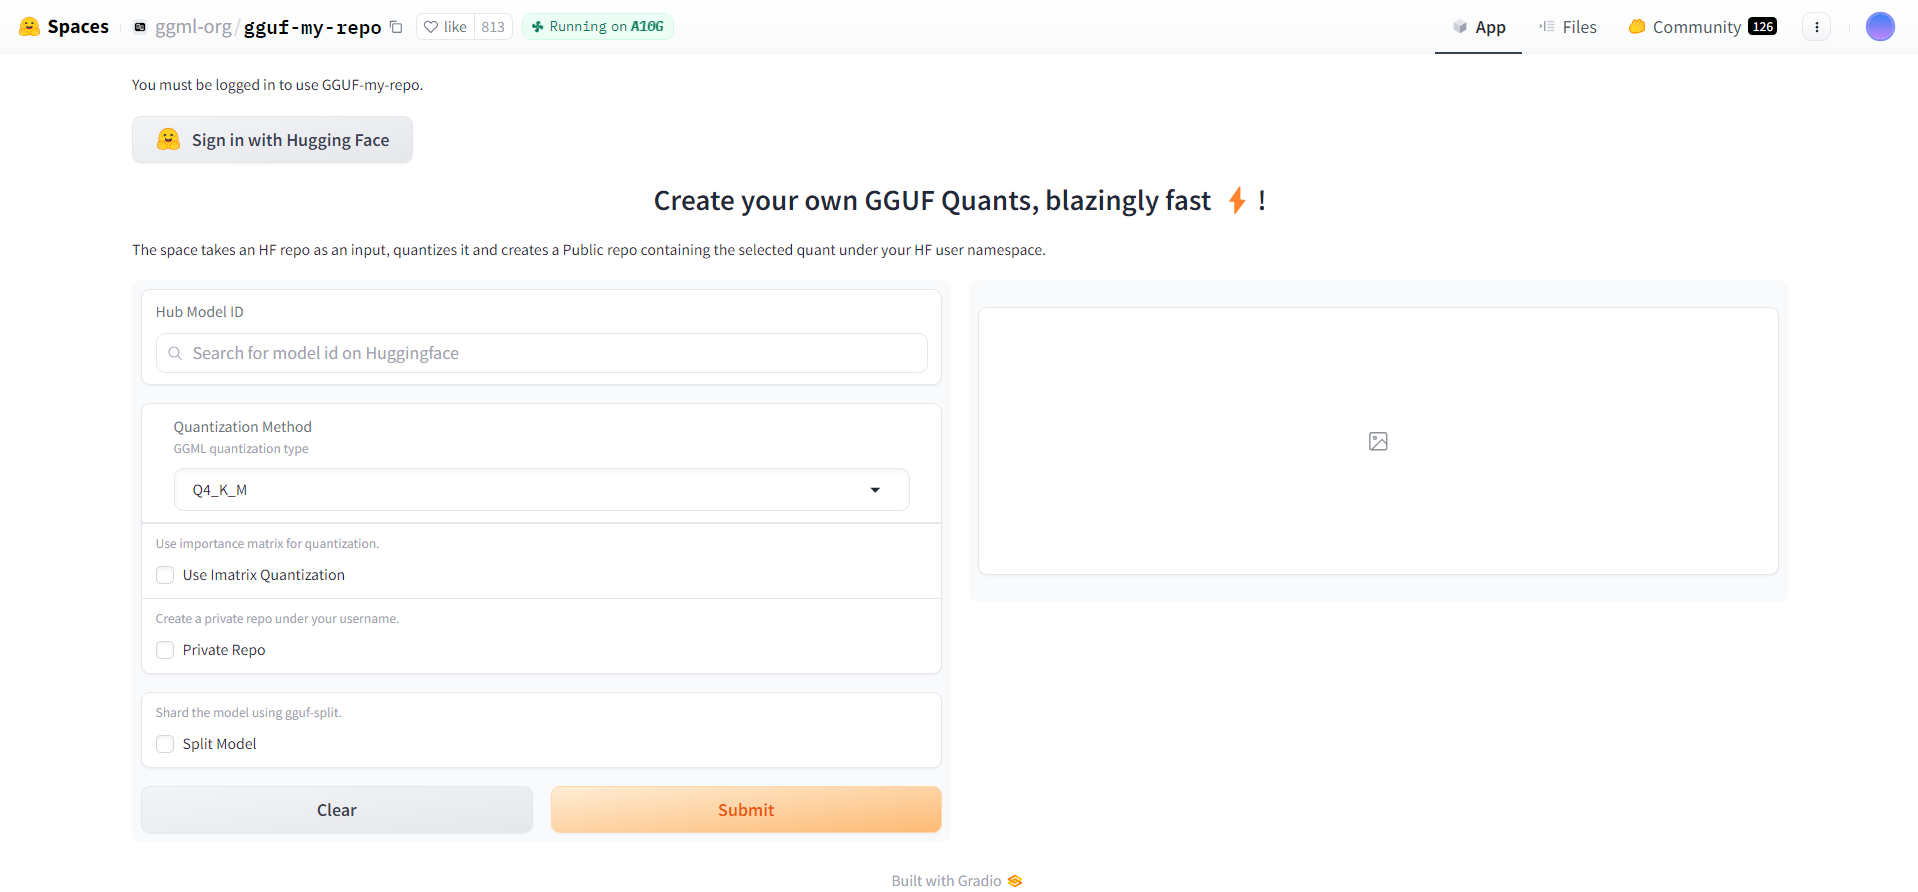
3. Sign in to your Hugging Face account.
4. Search for the model ID in the space.
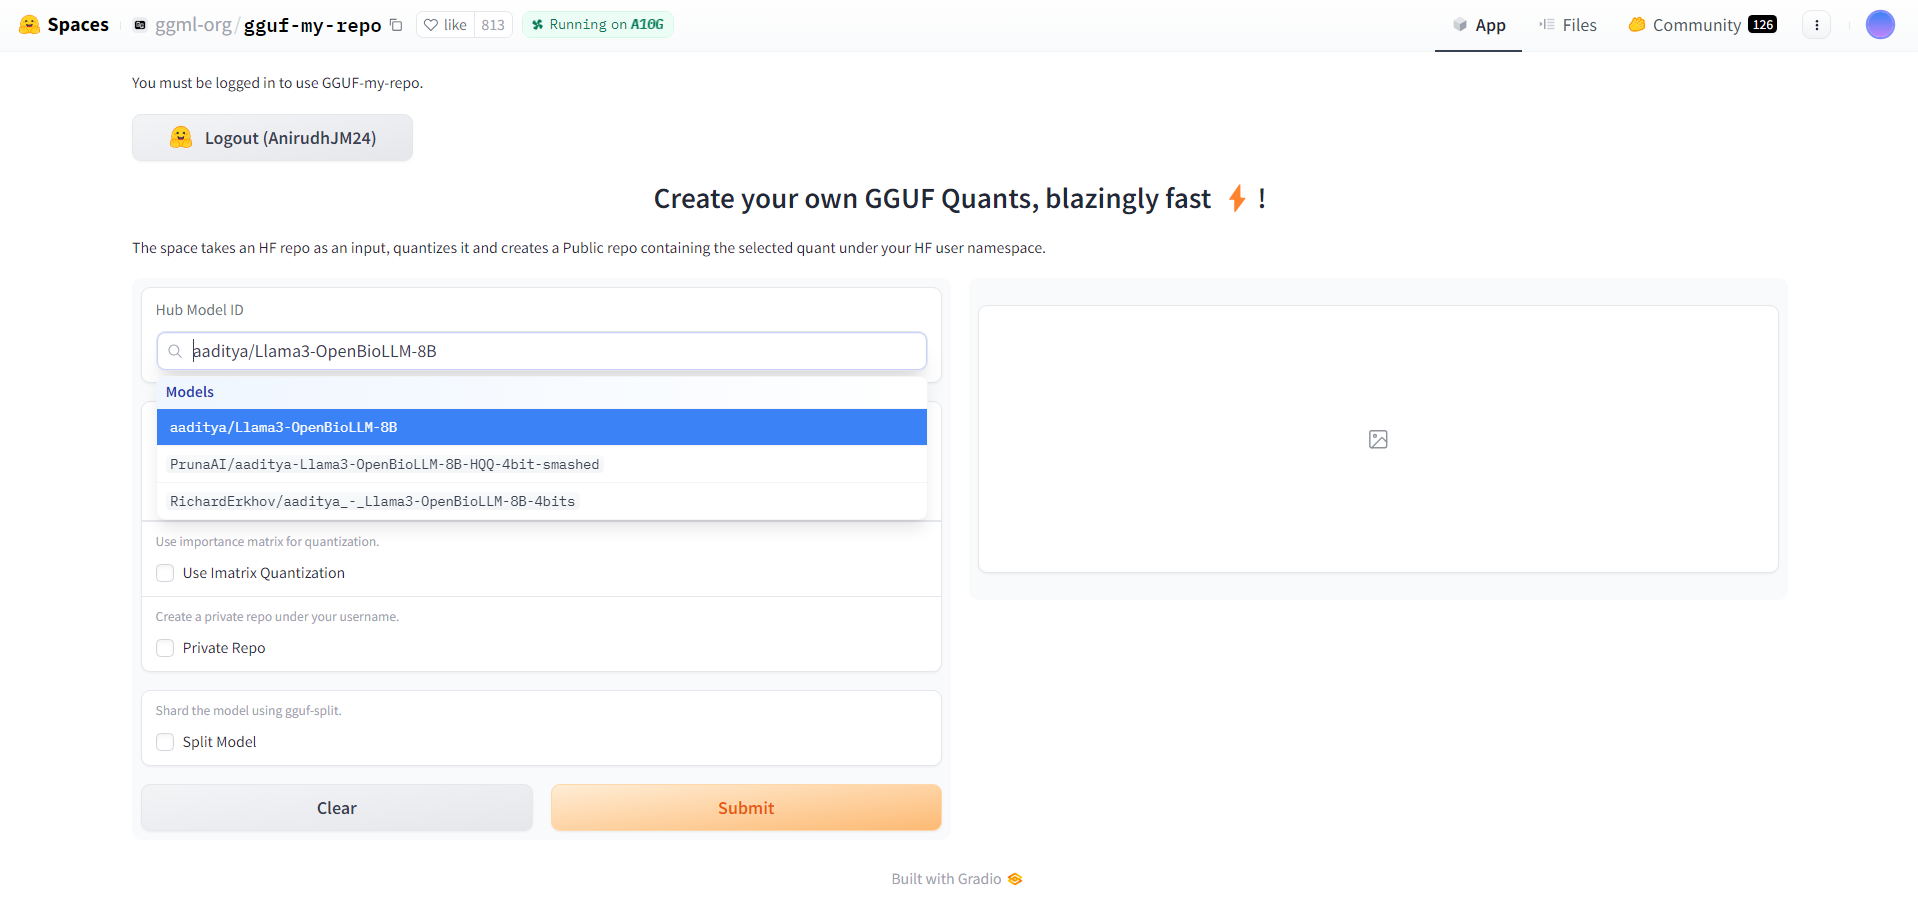
5. Choose the appropriate quantization type. To learn more about GGUF models,quantization and its types please visit https://huggingface.co/docs/hub/en/gguf.
For this recipe we will be using the `Q4_K_M` quantization
6. Submit and wait for the space to generate your quantized model. The Quantization will take upto 2-3 minutes to complete. Post completion, the quantized model will be available on your profile under the **`Models`** section.
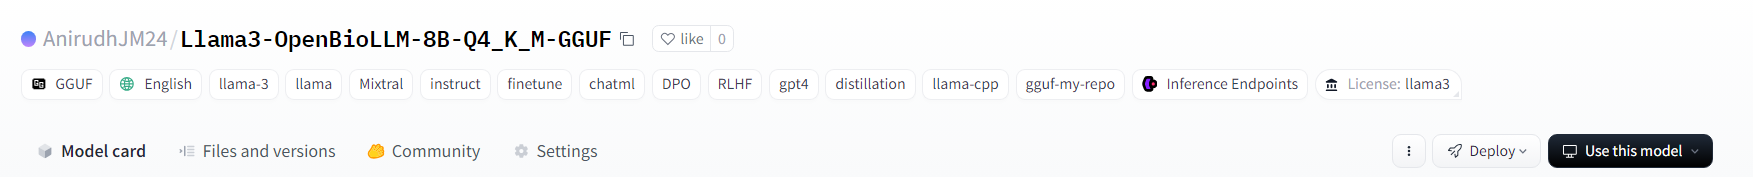

By leveraging the `llama-cpp-python` library, we will be able to perform efficient inference with this quantized LLaMA model, maintaining performance while optimizing for speed and memory usage.

## Step 2 - Setting up the Environment On Google Colab
Now that we have quantized the model of our choice, let us set up our environment to run inference using `llama-cpp-python` library.

Requirements:

- [`llama-cpp-python`](https://github.com/abetlen/llama-cpp-python)
- `ccache` for faster build times

In [ ]:
# Install ccache, a compiler cache tool, which helps to speed up the compilation process by caching previous compilations
!sudo apt-get install -y ccache  # -y flag automatically confirms the installation without prompting the user

In [ ]:
# GPU llama-cpp-python Installation

# 1. To enable GPU support with CUDA, use the following command:
#!CMAKE_ARGS="-DGGML_CUDA=on" FORCE_CMAKE=1 pip install llama-cpp-python  --no-cache-dir --verbose --upgrade

# 2. To install pre-built wheels for your specific CUDA version, first verify your CUDA version:
#    Run `nvcc --version` to check your installed CUDA version.

# 3. Then, run the appropriate installation command with the correct CUDA version:

# For example:
#   pip install llama-cpp-python \
#     --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/<cuda-version>

# Replace <cuda-version> with one of the following options:
# - `cu121`: CUDA 12.1
# - `cu122`: CUDA 12.2
# - `cu123`: CUDA 12.3
# - `cu124`: CUDA 12.4
# - `cu125`: CUDA 12.5

# Example installation for CUDA 12.1:
#   pip install llama-cpp-python \
#     --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu121

! CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 && pip install --no-cache-dir llama-cpp-python==0.2.90 --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu122 # The current version of llama-cpp-python at this time (0.3.1) fails to use the GPU on colab

## Step 3 - Loading The Model And Running Inference

1. **Download the Model with llama-cpp-python**  
   Using the `from_pretrained()` function, we can download a model directly from Hugging Face. Ensure that the `huggingface-hub` library is installed before proceeding.

2. **Load the Model with llama-cpp-python**  
   After downloading the model, the next step is to load it using the `llama-cpp-python` library.

3. **Run Inference**  
   Once the model is successfully loaded, we can use the chat template provided by the model's author, supply a prompt, and run inference to get the output.



In [8]:
# Importing the Llama class from the llama_cpp package
from llama_cpp import Llama

# Downloading the Llama model using a quantized model file
# 'repo_id' specifies the repository containing the model
# 'filename' refers to the specific quantized model file to be used
# 'verbose' is set to False to suppress detailed output during model loading

quantized_modelfile = Llama.from_pretrained(
    repo_id="AnirudhJM24/Llama3-OpenBioLLM-8B-Q4_K_M-GGUF",
    filename="llama3-openbiollm-8b-q4_k_m.gguf",
    verbose=False
)

# We can see where the model is stored by printing quantized_modelfile.model_path


In [ ]:
# Initializing the Llama model with the specified parameters
# 'model_path' is set to the path of the quantized model file from the previously initialized model
# 'chat_format' is set to "chatml" to define the conversation format
# 'n_gpu_layers' is set to -1, which means the model will run entirely on the CPU (no layers offloaded to the GPU)

lcpp_model = Llama(
    model_path=quantized_modelfile.model_path,  # Path to the quantized model file
    chat_format="chatml",  # Using the 'chatml' format for conversations
    n_gpu_layers=-1  # Running on CPU (no GPU layers)
)


In [ ]:
# Creating a chat completion using the Llama model
# This will simulate a conversation between the system (model) and the user

response = lcpp_model.create_chat_completion(

    messages = [
      {"role": "system", "content": "You are an expert and experienced from the healthcare and biomedical domain with extensive medical knowledge and practical experience. Your name is OpenBioLLM, and you were developed by Saama AI Labs. who's willing to help answer the user's query with explanation. In your explanation, leverage your deep medical expertise such as relevant anatomical structures, physiological processes, diagnostic criteria, treatment guidelines, or other pertinent medical concepts. Use precise medical terminology while still aiming to make the explanation clear and accessible to a general audience."},
      {"role": "user", "content": "How to cure my headache from dehydration?"}
    ],

    # The temperature controls the randomness of the output (higher value = more random)
    temperature=0.3,
)



In [15]:
print(response['choices'][0]['message']['content'])

Dehydration can cause headaches due to the body's loss of fluids and electrolytes, which are necessary for proper brain function. To alleviate your headache caused by dehydration, you can follow these steps:  1. Drink plenty of fluids: The most effective way to rehydrate is by drinking water. Aim for at least 8-10 cups (64-80 ounces) of water throughout the day.  2. Avoid caffeine and alcohol: These substances can actually worsen dehydration and may also trigger headaches. It is advisable to limit or avoid consumption of coffee, tea, soda, and alcoholic beverages until you have rehydrated.  3. Replenish electrolytes: In addition to water, your body also needs electrolytes (such as sodium, potassium, and magnesium) to function properly. Consider drinking an electrolyte-rich beverage like coconut water, sports drinks, or diluted fruit juice to help replenish these essential minerals.  4. Rest and relax: Excessive physical activity or stress can contribute to headaches. Take some time to 

# Running an 8 Billion Parameter Model with Just 5 GB of RAM


By combining these strategies, it’s possible to run an 8 billion parameter model within a constrained environment, effectively utilizing only 5 GB of RAM. This opens up opportunities for experimentation with large-scale models even on machines with limited resources.



In [16]:
# Use the following command to check GPU usage
!nvidia-smi

Thu Oct  3 15:50:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0              32W /  70W |   5535MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--